In [1]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("CarPrice_Assignment.csv")
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset = dataset.drop(['CarName'], axis=1)

In [6]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Checking missing values

dataset.isnull().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# we have to handle outlier for the listed variables
# wheelbase, carlength, carwidth, enginesize, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg

In [9]:
columns_to_check = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke', 
                    'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Function to detect and treat outliers
def treat_outliers(dataset, columns):
    for col in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers 
        dataset[col] = dataset[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return dataset

# Apply the function
dataset = treat_outliers(dataset, columns_to_check)

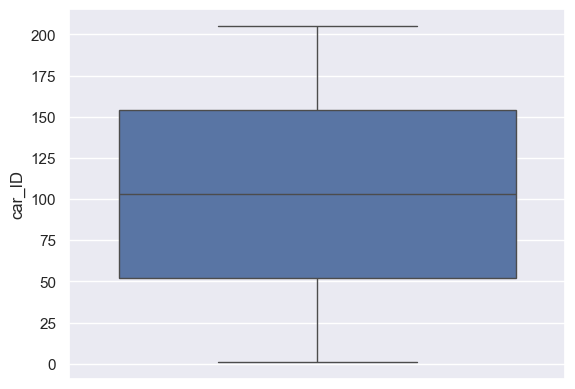

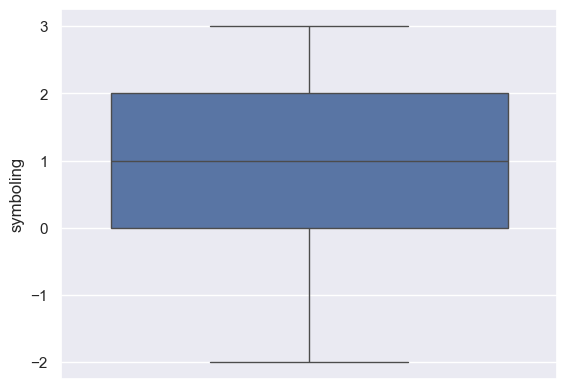

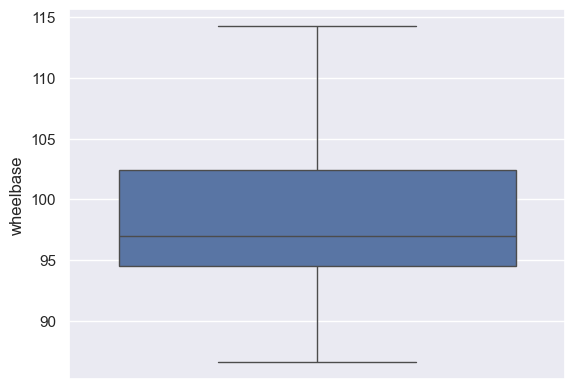

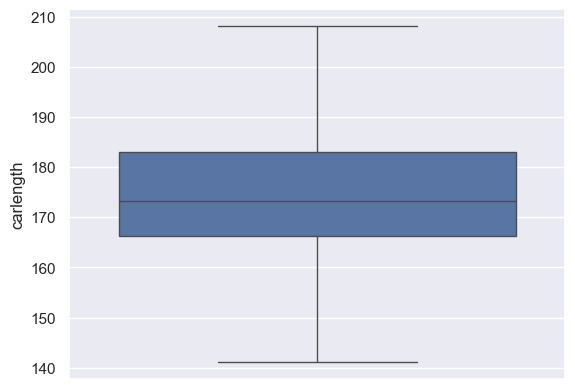

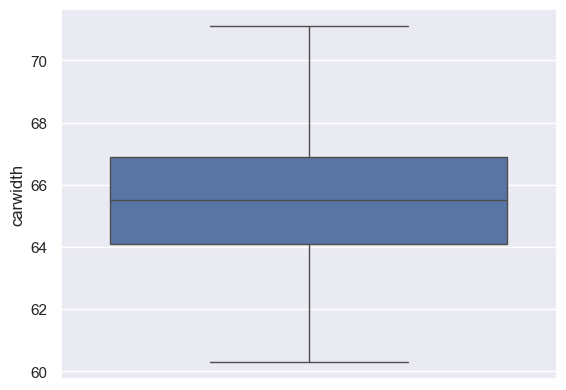

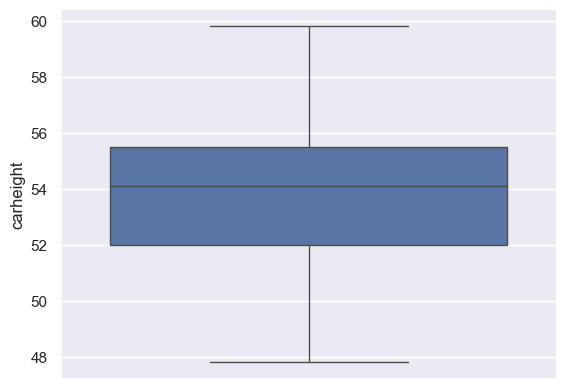

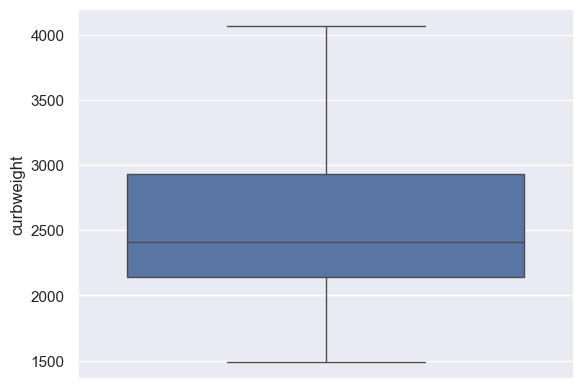

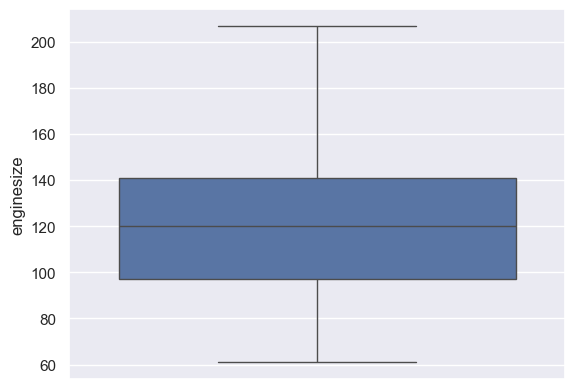

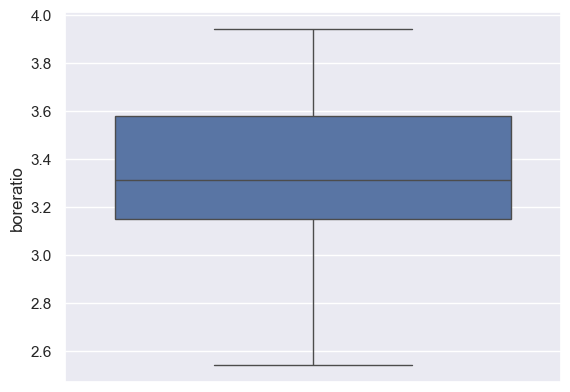

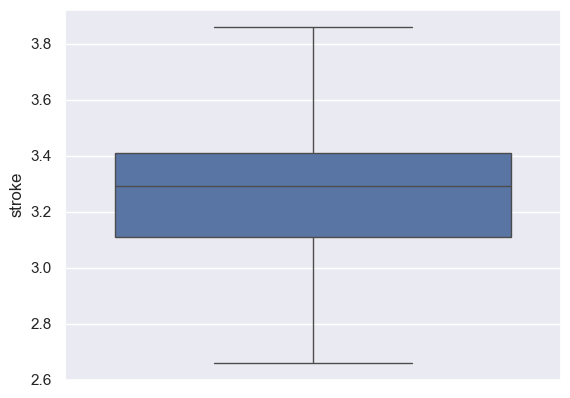

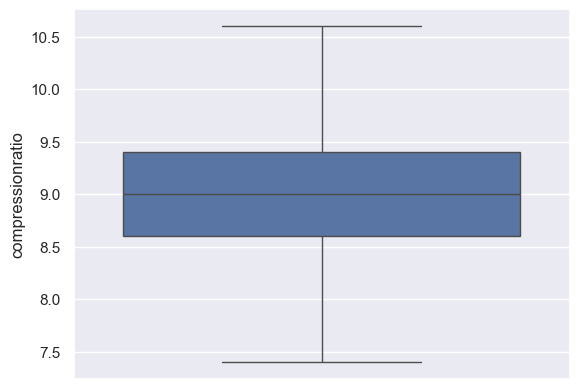

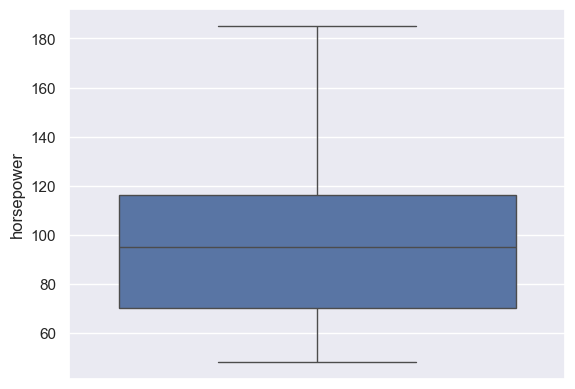

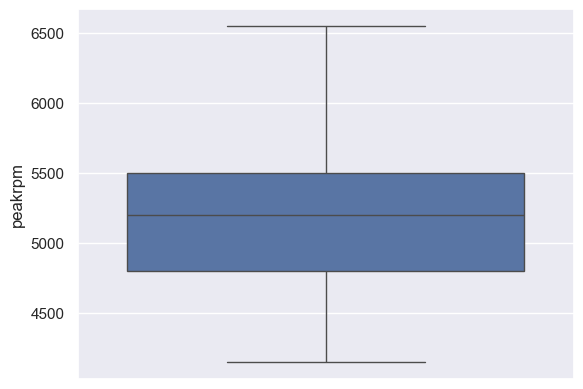

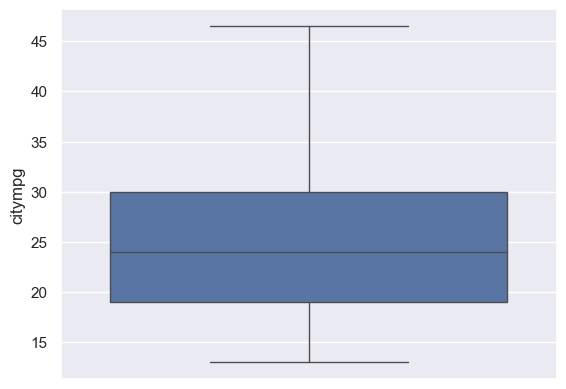

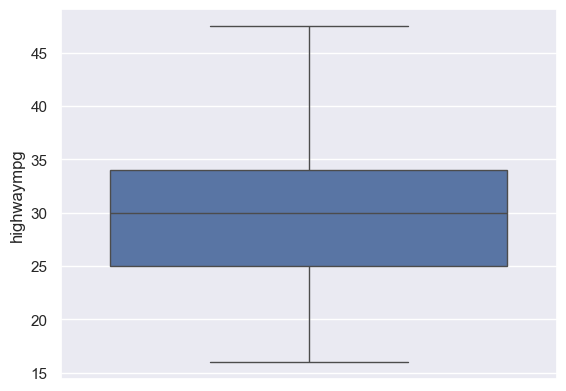

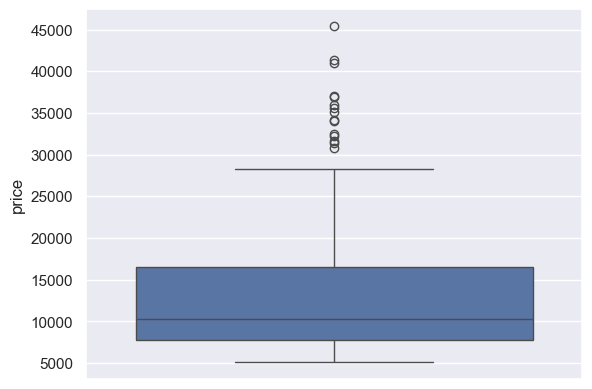

In [10]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()

for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [11]:
#Convert categorical features (fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, 
#enginetype, cylindernumber, fuelsystem) 
#into numerical using Label Encoding.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['fueltype']= le.fit_transform(dataset['fueltype'])
dataset['aspiration']= le.fit_transform(dataset['aspiration'])
dataset['doornumber']= le.fit_transform(dataset['doornumber'])
dataset['carbody']= le.fit_transform(dataset['carbody'])
dataset['drivewheel']= le.fit_transform(dataset['drivewheel'])
dataset['enginelocation']= le.fit_transform(dataset['enginelocation'])
dataset['enginetype']= le.fit_transform(dataset['enginetype'])
dataset['cylindernumber']= le.fit_transform(dataset['cylindernumber'])
dataset['fuelsystem']= le.fit_transform(dataset['fuelsystem'])

In [12]:
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,1,0,2,0,88.6,168.8,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,2,1,0,0,3,0,0,99.4,176.6,...,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [13]:
x = dataset.iloc[:,0:-1] # Independent variable
y = dataset.iloc[:,-1] # Dependent variable (Price)

In [14]:
x.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,1,0,1,0,2,0,88.6,168.8,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,3,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,2,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,5,2,1,0,0,3,0,0,99.4,176.6,...,1,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0


In [15]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.723622,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.426521,...,-0.147475,0.160196,0.869568,0.519071,-2.106623,-0.049433,0.229801,-0.262757,-0.649321,-0.552143
1,-1.706724,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.426521,...,-0.147475,0.160196,0.869568,0.519071,-2.106623,-0.049433,0.229801,-0.262757,-0.649321,-0.552143
2,-1.689826,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.717590,-0.231513,...,1.112210,0.809329,0.869568,-2.404880,0.753841,-0.049433,1.441341,-0.262757,-0.958163,-0.702161
3,-1.672928,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.185580,0.207256,...,-0.147475,-0.459430,0.869568,-0.517266,0.500383,1.214121,-0.023777,0.791357,-0.186058,-0.102086
4,-1.656029,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.117416,0.207256,...,-1.407161,0.337232,0.869568,-0.517266,0.500383,-1.312986,0.342502,0.791357,-1.112584,-1.302237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,-0.147475,0.484762,0.869568,1.666445,-0.404828,0.582344,0.314327,0.580534,-0.340479,-0.402124
201,1.672928,-1.476452,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,-0.147475,0.484762,0.869568,1.666445,-0.404828,-0.428499,1.610393,0.369711,-0.958163,-0.852180
202,1.689826,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,1.112210,1.428955,0.869568,0.926204,-1.418663,-0.302143,0.877834,0.791357,-1.112584,-1.152218
203,1.706724,-1.476452,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,1.112210,0.602787,-0.126306,-1.183483,0.500383,1.972253,0.088924,-0.684403,0.122783,-0.552143


In [17]:
pd.DataFrame(sc_x).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-6.932124e-17,4.332578e-17,-7.798640e-17,6.282238e-17,1.039819e-16,-1.646380e-16,-1.126470e-16,-8.665155e-18,-1.065814e-15,3.691356e-15,...,-1.386425e-16,-1.992986e-16,1.039819e-16,2.252940e-15,2.980813e-15,6.845473e-16,-2.057974e-17,-6.932124e-16,2.469569e-16,9.856614e-17
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-1.723622e+00,-2.281433e+00,-3.041381e+00,-4.692953e-01,-8.846517e-01,-3.050975e+00,-2.391492e+00,-1.218667e-01,-2.063824e+00,-2.677244e+00,...,-2.666846e+00,-1.875720e+00,-1.620116e+00,-2.923049e+00,-2.179040e+00,-2.071118e+00,-1.545246e+00,-2.054752e+00,-1.884688e+00,-2.202350e+00
25%,-8.618111e-01,-6.714717e-01,3.287980e-01,-4.692953e-01,-8.846517e-01,-7.172069e-01,-5.890807e-01,-1.218667e-01,-7.175899e-01,-6.296552e-01,...,-1.474754e-01,-8.135028e-01,-1.122179e+00,-6.653141e-01,-5.496614e-01,-5.548541e-01,-9.253886e-01,-6.844030e-01,-9.581629e-01,-8.521802e-01
50%,0.000000e+00,1.335090e-01,3.287980e-01,-4.692953e-01,-8.846517e-01,4.496773e-01,-5.890807e-01,-1.218667e-01,-2.915663e-01,-6.900603e-02,...,-1.474754e-01,-1.348641e-01,8.695675e-01,-7.312136e-02,1.020901e-01,-4.943268e-02,-2.210047e-01,1.588884e-01,-1.860584e-01,-1.020860e-01
75%,8.618111e-01,9.384897e-01,3.287980e-01,-4.692953e-01,1.130388e+00,4.496773e-01,1.213330e+00,-1.218667e-01,6.286445e-01,7.354037e-01,...,-1.474754e-01,4.847625e-01,8.695675e-01,9.262039e-01,5.365910e-01,4.559888e-01,3.706777e-01,7.913570e-01,7.404671e-01,4.979894e-01
max,1.723622e+00,1.743470e+00,3.287980e-01,2.130854e+00,1.130388e+00,1.616562e+00,1.213330e+00,8.205689e+00,2.647996e+00,2.766741e+00,...,4.891266e+00,2.432160e+00,1.865441e+00,2.258638e+00,2.165970e+00,1.972253e+00,2.314777e+00,3.004997e+00,3.288412e+00,2.523244e+00


In [18]:
# It's multiple linear regression, hence we have to check "Multicollinearity"
variable = sc_x
variable.shape

(205, 24)

### To check Multicollinearity - VIF (Variance Inflation Factor)

In [19]:
# VIF value is more than 5 means there is a multicollinearity there in the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [20]:
vif

,variance_inflation_factor,Features
0,1.479131,car_ID
1,2.828315,symboling
2,5.584468,fueltype
3,3.122923,aspiration
4,2.780304,doornumber
5,2.813480,carbody
6,2.626872,drivewheel
7,1.805014,enginelocation
8,10.551627,wheelbase
9,11.537443,carlength


### Finding correlation

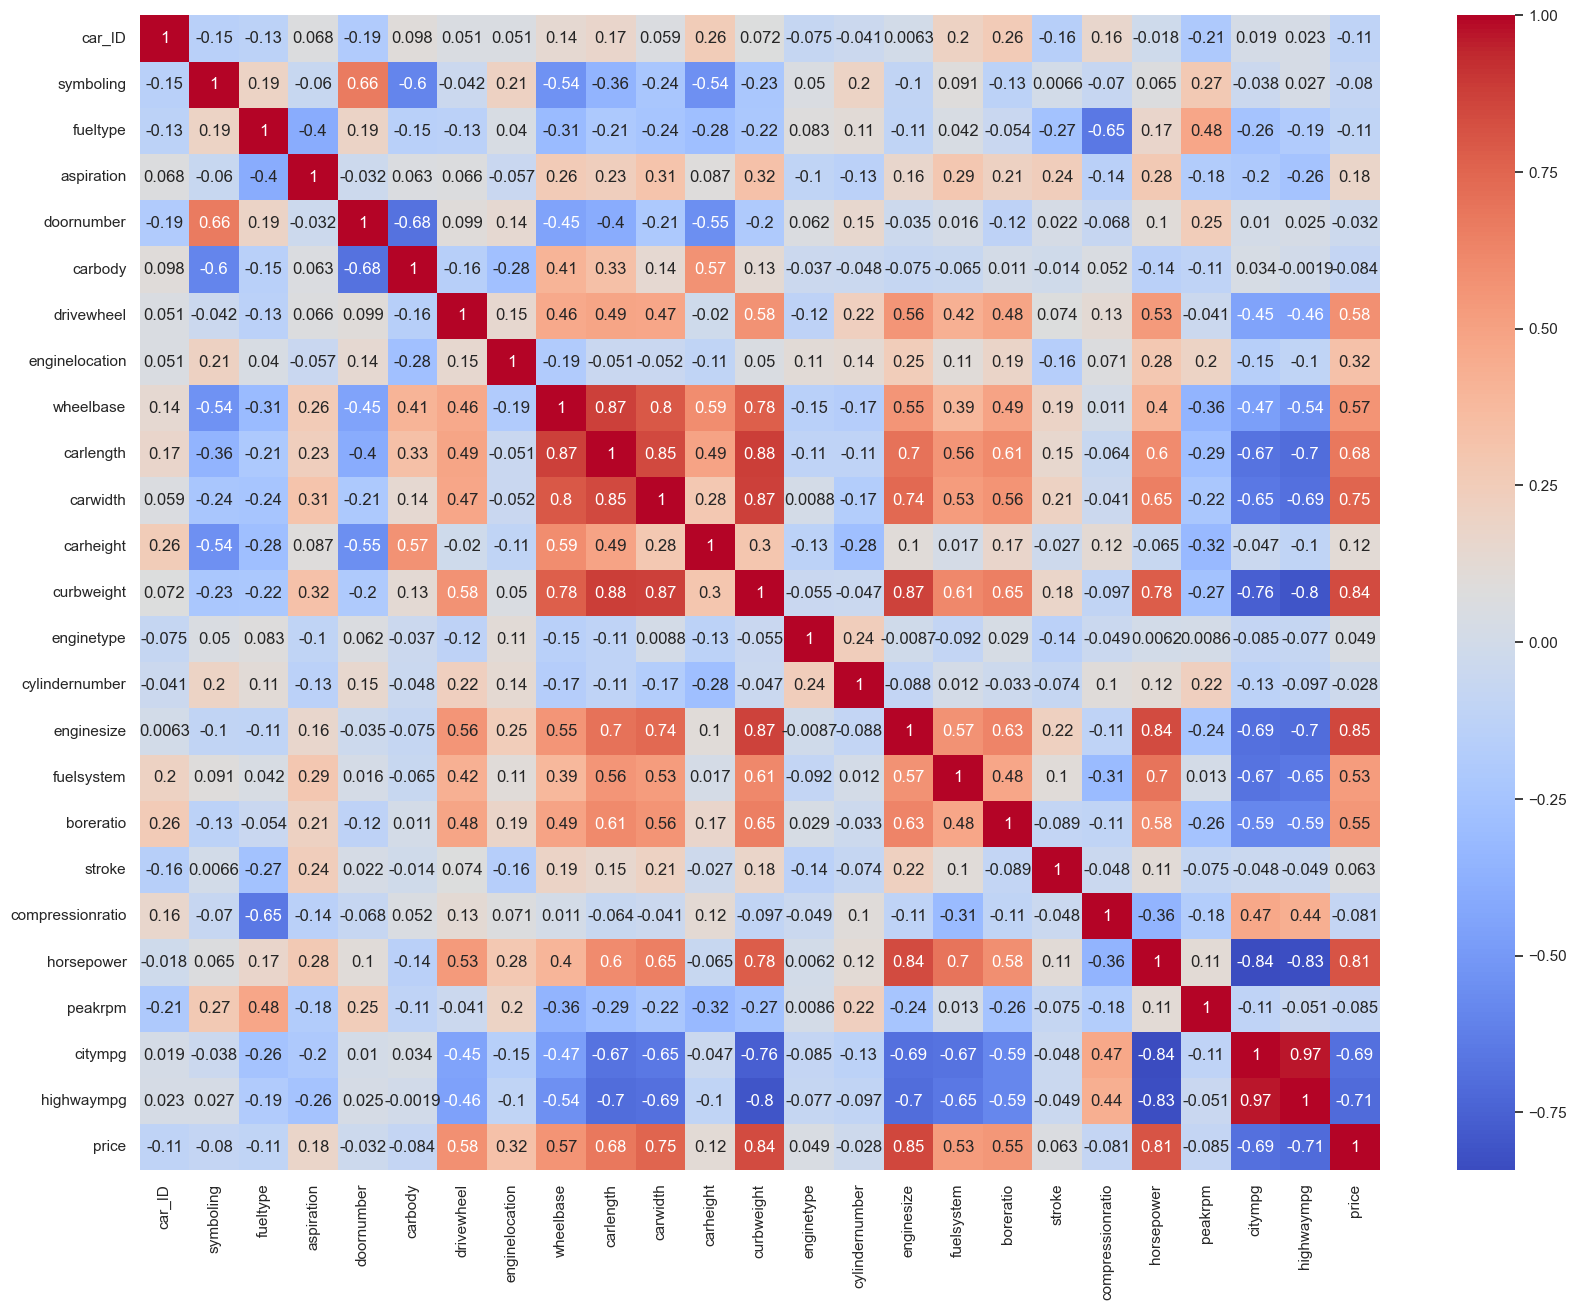

In [21]:
plt.figure(figsize=(20,15))
#corr = Housing.corr()
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

### We have multicorrelated variables hence we need to apply PCA for dimensionality reduction

In [22]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(sc_x)

In [23]:
# Let's check the explained variance ratio to understand how much information each principal component retains

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.32886298, 0.16703802, 0.08388498, 0.06767003, 0.05224637,
       0.04496342, 0.04141339, 0.03759184, 0.02859023, 0.02565239,
       0.02152603, 0.01876589, 0.01566118, 0.01416775, 0.01235966])

In [24]:
# Split the Data into Train and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Linear Regression

In [25]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([24495.64959172, 21391.61915098,  9280.41659459, 14280.61097737,
       26711.1821066 ,  6593.44981859,  7609.43157162,  6705.47725175,
       10787.37603735,  6103.55009794, 15386.77862939,  7481.39209327,
       15623.12078086, 11115.45256861, 33341.20982346,  4873.97687978,
       -4220.80495503, 14118.81572874,  9798.09584758, 11299.01521206,
       11299.17916788, 21308.15377546,  6883.26415079,  1776.51983521,
        6805.8324699 , 25958.839732  , 13889.49843904, 15831.3596836 ,
        4929.01094257, 17103.50952177, 27360.17456389,  6120.31202415,
        4707.26111497, 22375.70714452,  7819.91713441, 28456.93563104,
       10164.205043  , 10447.43562098,  5516.22217562, 14293.09217264,
        9136.07052383])

In [27]:
# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R-squared: {r2_lr}")


Linear Regression Evaluation:
MAE: 2664.127335130712
MSE: 15831151.943431232
R-squared: 0.7994635721992898


### Random Forest Regression

In [28]:
# Apply Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([21234.63 , 18537.87 ,  8714.31 , 13026.23 , 25965.325,  6058.375,
        7265.   ,  7981.51 , 11639.49 ,  7341.47 , 16354.65 ,  7795.71 ,
       20358.115, 11458.66 , 29814.24 ,  6725.2  ,  6060.105, 14912.97 ,
        8046.03 , 11253.13 , 10940.97 , 14698.61 ,  5919.275,  6733.36 ,
        7302.65 , 26782.405,  9648.25 , 16688.52 ,  7312.43 , 16223.62 ,
       30686.165,  7150.98 ,  7857.12 , 19450.63 ,  8308.2  , 27680.455,
       11402.46 , 11931.18 ,  6975.285, 15020.66 ,  8733.14 ])

In [29]:
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Evaluation:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R-squared: {r2_rf}")


Random Forest Regression Evaluation:
MAE: 2090.739463414634
MSE: 13142203.156256925
R-squared: 0.8335250344507925


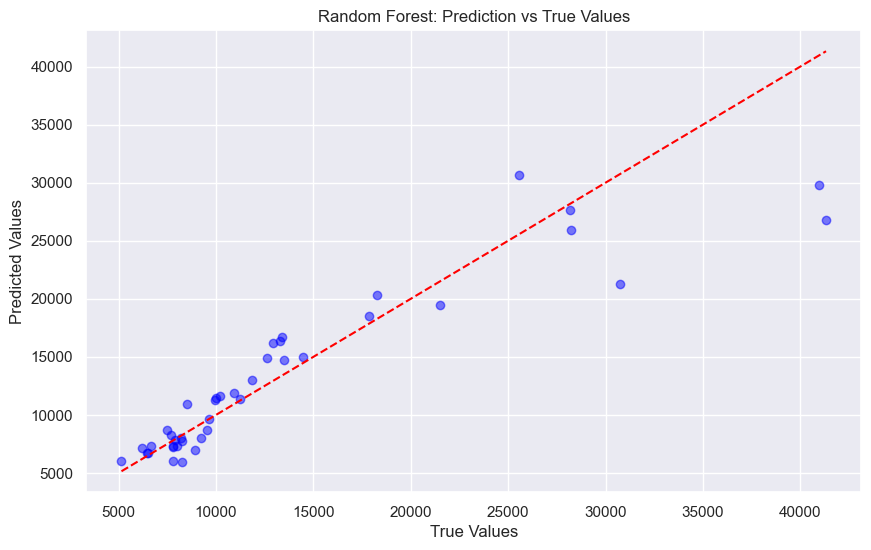

In [30]:
# Prediction vs True Values Plot (for Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.title('Random Forest: Prediction vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


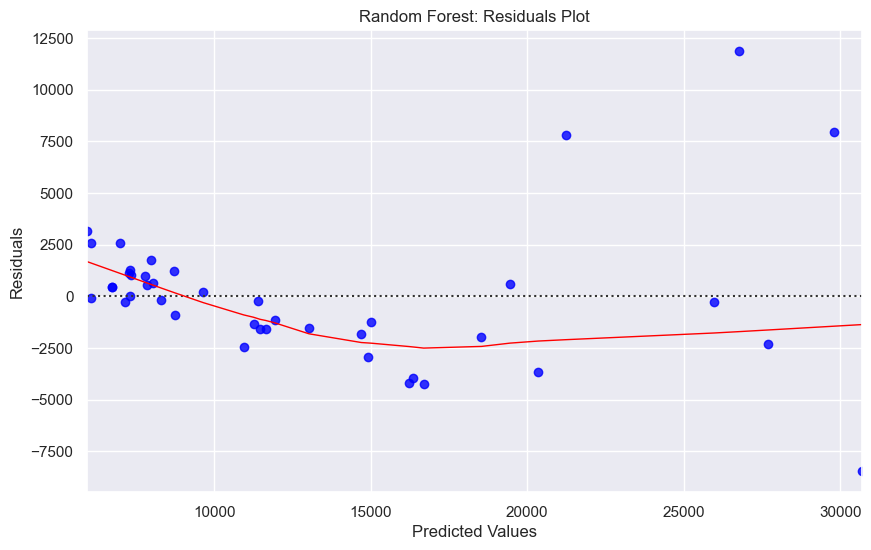

In [31]:
# Residuals Plot (Random Forest)
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
plt.title('Random Forest: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

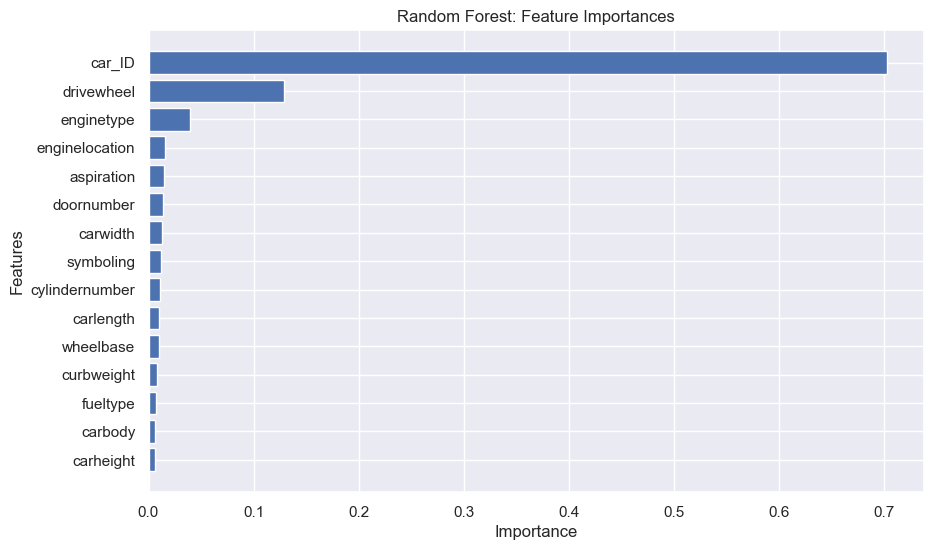

In [32]:
# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
features = x.columns

# Sort feature importances in descending order
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Random Forest: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Ridge Regression

In [33]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate Ridge
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R-squared: {r2_score(y_test, y_pred_ridge)}")

Ridge Regression Performance:
MAE: 2660.1791265483457
MSE: 15824634.958824884
R-squared: 0.7995461241713546


### Lasso Regression

In [34]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions and evaluate Lasso
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso)}")


Lasso Regression Performance:
MAE: 2664.0331372881587
MSE: 15830174.791726185
R-squared: 0.7994759499790653


### Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Apply Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate GB
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb)}")
print(f"R-squared: {r2_score(y_test, y_pred_gb)}")



Gradient Boosting Regression Performance:
MAE: 2151.261016339273
MSE: 13214894.044313649
R-squared: 0.8326042441585482


### XGBoost Regressor

In [36]:
import xgboost as xgb

# Apply XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")



XGBoost Regression Performance:
MAE: 1991.606135480183
MSE: 11071641.628366638
R-squared: 0.8597532592716014


In [ ]:
# from sklearn.svm import SVR

# # Apply SVR
# svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# svr_model.fit(X_train, y_train)

# # Make predictions and evaluate SVR
# y_pred_svr = svr_model.predict(X_test)
# print("\nSupport Vector Regression Performance:")
# print(f"MAE: {mean_absolute_error(y_test, y_pred_svr)}")
# print(f"MSE: {mean_squared_error(y_test, y_pred_svr)}")
# print(f"R-squared: {r2_score(y_test, y_pred_svr)}")